### 연습

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%84%9C%EC%9A%B8%EC%A4%91%EA%B5%AC%EC%9D%84%EC%A7%80%EB%A1%9C%EF%BC%91%EA%B0%80%ED%95%98%EB%82%98%EC%9D%80%ED%96%89%EB%B9%8C%EB%94%A9%EF%BC%91%EF%BC%90%EF%BC%91%EF%BC%8D%EF%BC%91%EF%BC%91%EF%BC%99%EC%B8%B5&oquery=%EC%84%9C%EC%9A%B8%EC%8B%9C%EC%A4%91%EA%B5%AC%EB%82%A8%EB%8C%80%EB%AC%B8%EB%A1%9C%EF%BC%92%EA%B0%80%EF%BC%91%EF%BC%90%EF%BC%8D%EF%BC%91&tqi=hiRnrwp0YidssbIhTuCssssstuZ-023944"
response = requests.request("GET", url)

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="서울중구을지로１가하나은행빌딩１０１－１１９층 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'서울중구을지로１가하나은행빌딩１０１－１１９층'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'서울중구을지로１가하나은행빌딩１０１－１１９층'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>서울중구을지로１가하나은행빌딩１０１－１１９층 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_21
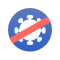
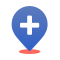
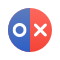
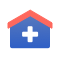

In [46]:
data = BeautifulSoup(response.text, 'html.parser')
print(data)

In [58]:
daily = data.find('div', attrs={'class', 'ITiBH'})
if daily is None :
    print("안녕")

안녕


In [25]:
from selenium import webdriver
from urllib.parse import quote_plus

In [37]:
baseUrl = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='

In [38]:
plusUrl = input('무엇을 검색할까요? : ')

무엇을 검색할까요? : 사과


In [39]:
url = baseUrl + quote_plus(plusUrl)

In [40]:
browser = webdriver.Chrome('./chromedriver_win32 (1)/chromedriver.exe')

In [41]:
browser.get(url)

In [42]:
response = requests.request("GET", url)

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="사과 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'사과'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'사과'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>사과 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211021.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst
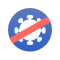
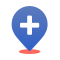
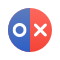
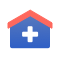

In [43]:
data = BeautifulSoup(response.text, 'html.parser')
print(data)

### 정리

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [62]:
baseUrl = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='

In [63]:
# 시험
temp = ['서울시중구남대문로２가１０－１', '서울중구을지로１가１０１－１', '서울중구을지로１가하나은행빌딩１０１－１１９층']
final = []
for i in temp :
    plusUrl = i
    url = baseUrl + quote_plus(plusUrl)
    response = requests.request("GET", url)
    data = BeautifulSoup(response.text, 'html.parser')
    daily = data.find('div', attrs={'class', 'ITiBH'})
    if daily is None :
        final.append("수정필요")
    else :
        final.append(daily.text)
final

['서울특별시 중구 남대문로2가 10-1', '서울특별시 중구 을지로1가 101-1', '수정필요']

In [69]:
df = pd.read_csv('서울내_주요은행_위치정보.csv', encoding = 'cp949')
df

,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
0,0,신협,가나안상일지점,서울특별시강동구천호대로１４８７,NaN,NaN
1,1,신협,가나안신협강일지점,서울특별시강동구아리수로９３길３３，２０１호（강일동，강일베스트프라자）,NaN,NaN
2,2,신협,가나안신협고덕지점,서울특별시강동구고덕로３８５，１１４호（고덕동，고덕그라시움상가４동）,NaN,NaN
3,3,신협,가락신협,서울특별시송파구양재대로９３２가락몰판매동２층００３－１호,NaN,NaN
4,4,신협,가락신협석촌지점,서울특별시송파구송파대로４５４태영빌딩,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시강남구도곡로４０８디마크빌딩３층,NaN,NaN
5295,5295,산업,해외사업실,서울특별시영등포구은행로１４,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN


In [71]:
df = df.iloc[3974:]
df

,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
3974,3974,하나,신설동（지）,서울시종로구숭인동１３７１,NaN,NaN
3975,3975,하나,신설동（지）,서울종로구숭인동１３６５,NaN,NaN
3976,3976,하나,신용감리섹션,서울중구을지로１가하나은행빌딩１０１－１１９층,NaN,NaN
3977,3977,하나,신용관리팀,서울시중구남대문로２가１０－１,NaN,NaN
3978,3978,하나,신용리스크관리섹션,서울중구을지로１가１０１－１,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시강남구도곡로４０８디마크빌딩３층,NaN,NaN
5295,5295,산업,해외사업실,서울특별시영등포구은행로１４,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN


In [73]:
location = df['주소'].tolist()
len(location)

1325

## 네이버에서 정리된 주소 크롤링

In [74]:
switch = []
for i in location :
    plusUrl = i
    url = baseUrl + quote_plus(plusUrl)
    response = requests.request("GET", url)
    data = BeautifulSoup(response.text, 'html.parser')
    daily = data.find('div', attrs={'class', 'ITiBH'})
    if daily is None :
        switch.append("수정필요")
    else :
        switch.append(daily.text)
switch

['서울특별시 종로구 숭인동 1371',
 '서울특별시 종로구 숭인동 1365',
 '수정필요',
 '서울특별시 중구 남대문로2가 10-1',
 '서울특별시 중구 을지로1가 101-1',
 '서울특별시 용산구 한강로2가 210-1',
 '서울특별시 양천구 신월7동 931-8',
 '서울특별시 강서구 화곡1동 425-13',
 '서울특별시 양천구 신월1동 116-31',
 '서울특별시 광진구 자양동 553-43',
 '서울특별시 광진구 자양4동 857',
 '서울특별시 양천구 신정1동 1029-12',
 '서울특별시 양천구 신정동 1031-3',
 '서울특별시 양천구 신정동 126-5',
 '서울특별시 송파구 신천동 7-14',
 '서울특별시 송파구 신천동 7-14',
 '서울특별시 송파구 신천동 7',
 '서울특별시 송파구 신천동 7-14',
 '서울특별시 송파구 잠실동 209-5',
 '서울특별시 송파구 잠실동 184-21',
 '서울특별시 마포구 서강로 144',
 '서울특별시 마포구 노고산동 107-1',
 '서울특별시 마포구 노고산동 57-4',
 '서울특별시 마포구 동교동 185-11',
 '서울특별시 서대문구 창천동 30-33',
 '서울특별시 중구 을지로2가 181',
 '서울특별시 중구 을지로2가 9-10',
 '서울특별시 중구 남대문로2가 10-1',
 '수정필요',
 '서울특별시 중구 다동 140',
 '서울특별시 중구 을지로2가 9-10',
 '서울특별시 중구 남대문로2가 10-1',
 '서울특별시 강남구 삼성동 158-9',
 '서울특별시 송파구 잠실동 85',
 '서울특별시 송파구 잠실7동 85-1',
 '수정필요',
 '서울특별시 광진구 중곡동 115-8',
 '서울특별시 성북구 안암동5가 104-42',
 '서울특별시 성북구 안암동5가 104-6',
 '수정필요',
 '서울특별시 중구 을지로1가 101-1',
 '서울특별시 중구 남대문로2가 10-1',
 '서울특별시 중구 을지로2가 181',
 '서울특별시 강동구 암사동 452',


In [75]:
len(switch)

1325

In [76]:
df['주소'] = switch
df

<ipython-input-76-9dfa3f1c6fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주소'] = switch


,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
3974,3974,하나,신설동（지）,서울특별시 종로구 숭인동 1371,NaN,NaN
3975,3975,하나,신설동（지）,서울특별시 종로구 숭인동 1365,NaN,NaN
3976,3976,하나,신용감리섹션,수정필요,NaN,NaN
3977,3977,하나,신용관리팀,서울특별시 중구 남대문로2가 10-1,NaN,NaN
3978,3978,하나,신용리스크관리섹션,서울특별시 중구 을지로1가 101-1,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시 강남구 도곡로 408,NaN,NaN
5295,5295,산업,해외사업실,서울특별시 영등포구 은행로 14,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시 영등포구 은행로 14,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시 영등포구 은행로 14,NaN,NaN


In [77]:
df.to_csv("은행위치정보_수정.csv")

## 모든 은행

In [78]:
df_all = pd.read_csv('서울내_주요은행_위치정보.csv', encoding = 'cp949')
df_all

,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
0,0,신협,가나안상일지점,서울특별시강동구천호대로１４８７,NaN,NaN
1,1,신협,가나안신협강일지점,서울특별시강동구아리수로９３길３３，２０１호（강일동，강일베스트프라자）,NaN,NaN
2,2,신협,가나안신협고덕지점,서울특별시강동구고덕로３８５，１１４호（고덕동，고덕그라시움상가４동）,NaN,NaN
3,3,신협,가락신협,서울특별시송파구양재대로９３２가락몰판매동２층００３－１호,NaN,NaN
4,4,신협,가락신협석촌지점,서울특별시송파구송파대로４５４태영빌딩,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시강남구도곡로４０８디마크빌딩３층,NaN,NaN
5295,5295,산업,해외사업실,서울특별시영등포구은행로１４,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN


In [79]:
switch_all = []
for i in df_all['주소'].tolist() :
    plusUrl = i
    url = baseUrl + quote_plus(plusUrl)
    response = requests.request("GET", url)
    data = BeautifulSoup(response.text, 'html.parser')
    daily = data.find('div', attrs={'class', 'ITiBH'})
    if daily is None :
        switch_all.append("수정필요")
    else :
        switch_all.append(daily.text)
switch_all

['서울특별시 강동구 천호대로 1487',
 '서울특별시 강동구 아리수로93길 33',
 '서울특별시 강동구 고덕로 385',
 '수정필요',
 '서울특별시 송파구 송파대로 454',
 '서울특별시 중구 명동길 74',
 '서울특별시 서초구 반포대로 222',
 '서울특별시 은평구 통일로 1021',
 '서울특별시 서초구 방배4동 874-1',
 '서울특별시 관악구 조원로4길 6',
 '서울특별시 강남구 언주로 211',
 '서울특별시 성북구 돌곶이로22가길 12',
 '서울특별시 강서구 양천로 97',
 '수정필요',
 '서울특별시 동대문구 고산자로 487',
 '서울특별시 동대문구 사가정로 122',
 '서울특별시 서초구 방배4동 874-1',
 '서울특별시 서초구 방배4동 874-1',
 '서울특별시 관악구 양녕로 12',
 '서울특별시 중구 마장로1길 28',
 '서울특별시 중구 다산로 289',
 '서울특별시 구로구 공원로 71',
 '서울특별시 구로구 구로동로 126',
 '서울특별시 구로구 오류로 20',
 '서울특별시 구로구 구로동로 235',
 '서울특별시 용산구 이태원로 22',
 '서울특별시 서대문구 증가로 132',
 '서울특별시 서대문구 가재울미래로 11',
 '서울특별시 마포구 월드컵북로 64',
 '서울특별시 서대문구 응암로 108',
 '서울특별시 서초구 방배4동 874-1',
 '서울특별시 금천구 독산로 281',
 '서울특별시 금천구 시흥대로 164',
 '서울특별시 서초구 방배4동 874-1',
 '서울특별시 강남구 학동로 338',
 '서울특별시 강남구 개포로 506',
 '서울특별시 서초구 신반포로 219',
 '서울특별시 성동구 난계로 61',
 '수정필요',
 '서울특별시 구로구 경인로25길 12',
 '수정필요',
 '서울특별시 영등포구 영신로 238',
 '서울특별시 영등포구 양산로 134',
 '서울특별시 동대문구 왕산로 154',
 '서울특별시 영등포구 여의대방로 215',
 '수정필요',
 '서울특별시 동작구 

In [80]:
df_all['주소'] = switch_all
df_all

,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
0,0,신협,가나안상일지점,서울특별시 강동구 천호대로 1487,NaN,NaN
1,1,신협,가나안신협강일지점,서울특별시 강동구 아리수로93길 33,NaN,NaN
2,2,신협,가나안신협고덕지점,서울특별시 강동구 고덕로 385,NaN,NaN
3,3,신협,가락신협,수정필요,NaN,NaN
4,4,신협,가락신협석촌지점,서울특별시 송파구 송파대로 454,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시 강남구 도곡로 408,NaN,NaN
5295,5295,산업,해외사업실,서울특별시 영등포구 은행로 14,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시 영등포구 은행로 14,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시 영등포구 은행로 14,NaN,NaN


In [81]:
df_all.to_csv("서울은행위치정보.csv")

In [82]:
df_all = pd.read_csv('서울내_주요은행_위치정보.csv', encoding = 'cp949')
df_all

,Unnamed: 0,은행명,지점명,주소,Unnamed: 4,Unnamed: 5
0,0,신협,가나안상일지점,서울특별시강동구천호대로１４８７,NaN,NaN
1,1,신협,가나안신협강일지점,서울특별시강동구아리수로９３길３３，２０１호（강일동，강일베스트프라자）,NaN,NaN
2,2,신협,가나안신협고덕지점,서울특별시강동구고덕로３８５，１１４호（고덕동，고덕그라시움상가４동）,NaN,NaN
3,3,신협,가락신협,서울특별시송파구양재대로９３２가락몰판매동２층００３－１호,NaN,NaN
4,4,신협,가락신협석촌지점,서울특별시송파구송파대로４５４태영빌딩,NaN,NaN
...,...,...,...,...,...,...
5294,5294,산업,한티（지）,서울특별시강남구도곡로４０８디마크빌딩３층,NaN,NaN
5295,5295,산업,해외사업실,서울특별시영등포구은행로１４,NaN,NaN
5296,5296,산업,혁신성장금융부문,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN
5297,5297,산업,혁신신성장정책금융센터,서울특별시영등포구은행로１４한국산업은행본점,NaN,NaN


In [83]:
baseUrl = 'https://dorojuso.kr/1174011000103040001000004/'

In [84]:
switch_all = []
for i in df_all['주소'].tolist() :
    plusUrl = i
    url = baseUrl + quote_plus(plusUrl)
    response = requests.request("GET", url)
    data = BeautifulSoup(response.text, 'html.parser')
    daily = data.find('h1')
    switch_all.append(daily.text)
switch_all

['서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 강동구 아리수로93길 33 (강일동)',
 '서울특별시 